# Fraud detection using credit card transcation data

## 1. Load the data



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
sns.set(rc={'figure.figsize':(10,6)})

In [2]:
# Top 10 rows
with open('/content/drive/MyDrive/data/transactions.txt') as f:
    i=1
    for x in f:
      i+=1      
      print(x.rstrip())
      if (i > 10):
        break

{"accountNumber": "737265056", "customerId": "737265056", "creditLimit": 5000.0, "availableMoney": 5000.0, "transactionDateTime": "2016-08-13T14:27:32", "transactionAmount": 98.55, "merchantName": "Uber", "acqCountry": "US", "merchantCountryCode": "US", "posEntryMode": "02", "posConditionCode": "01", "merchantCategoryCode": "rideshare", "currentExpDate": "06/2023", "accountOpenDate": "2015-03-14", "dateOfLastAddressChange": "2015-03-14", "cardCVV": "414", "enteredCVV": "414", "cardLast4Digits": "1803", "transactionType": "PURCHASE", "echoBuffer": "", "currentBalance": 0.0, "merchantCity": "", "merchantState": "", "merchantZip": "", "cardPresent": false, "posOnPremises": "", "recurringAuthInd": "", "expirationDateKeyInMatch": false, "isFraud": false}
{"accountNumber": "737265056", "customerId": "737265056", "creditLimit": 5000.0, "availableMoney": 5000.0, "transactionDateTime": "2016-10-11T05:05:54", "transactionAmount": 74.51, "merchantName": "AMC #191138", "acqCountry": "US", "merchan

In [3]:
# Load data and transfrom it to a dataframe
data = []
with open('/content/drive/MyDrive/Vic_ML_20201104/data/transactions.txt') as f:
    for x in f:
        data.append(json.loads(x))

df = pd.DataFrame(data)

del data

In [4]:
df.to_csv('creditcard.csv') 

In [5]:
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,,0.0,,,,False,,,False,False
1,737265056,737265056,5000.0,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,True,,,False,False
2,737265056,737265056,5000.0,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,False,,,False,False
3,737265056,737265056,5000.0,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,False,,,False,False
4,830329091,830329091,5000.0,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,,0.0,,,,True,,,False,False


In [6]:
df.shape

(786363, 29)

In [7]:
df.describe(include='all')

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
count,786363,786363,786363.000000,786363.000000,786363,786363.000000,786363,786363,786363,786363,786363,786363,786363,786363,786363,786363,786363,786363,786363,786363,786363.000000,786363,786363,786363,786363,786363,786363,786363,786363
unique,5000,5000,NaN,NaN,776637,NaN,2490,5,5,6,4,19,165,1820,2184,899,976,5246,4,1,NaN,1,1,1,2,1,1,2,2
top,380680241,380680241,NaN,NaN,2016-12-25T14:04:15,NaN,Uber,US,US,05,01,online_retail,03/2029,2014-06-21,2016-03-15,869,869,593,PURCHASE,,NaN,,,,False,,,False,False
freq,32850,32850,NaN,NaN,4,NaN,25613,774709,778511,315035,628787,202156,5103,33623,3819,33749,33424,32946,745193,786363,NaN,786363,786363,786363,433495,786363,786363,785320,773946
mean,NaN,NaN,10759.464459,6250.725369,NaN,136.985791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4508.739089,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,11636.174890,8880.783989,NaN,147.725569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6457.442068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,250.000000,-1005.630000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,5000.000000,1077.420000,NaN,33.650000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,689.910000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,7500.000000,3184.860000,NaN,87.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2451.760000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,15000.000000,7500.000000,NaN,191.480000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5291.095000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. EDA (exploratory data analysis)


## 2.1 "isFraud" (Response variable)

In [8]:
print(df['isFraud'].value_counts())
print(df['isFraud'].mean())

False    773946
True      12417
Name: isFraud, dtype: int64
0.01579041740264992


Note: I will use 1.6% as the threshold for the classification model.

## 2.2 Column "posEntryMode" 

In [9]:
df['posEntryMode'].value_counts()

05    315035
09    236481
02    195934
90     19576
80     15283
        4054
Name: posEntryMode, dtype: int64

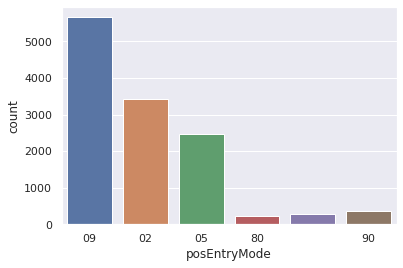

In [10]:
sns.countplot(data = df[df['isFraud']], x = 'posEntryMode')

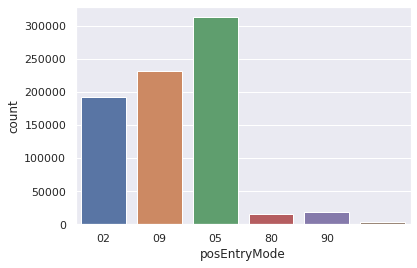

In [11]:
sns.countplot(data = df[~df['isFraud']], x = 'posEntryMode')

From the above 2 plots, it seems like "posEntryMode" has a influence on whether it is a fraud or not.

##2.3 Column "currentBalance"

In [12]:
df['currentBalance'].value_counts()

0.00        33678
8.46           26
5.67           19
29.42          19
59.68          18
            ...  
4167.11         1
2550.33         1
10824.85        1
3981.23         1
6830.15         1
Name: currentBalance, Length: 487318, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


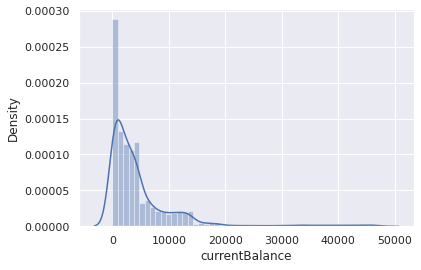

In [13]:
sns.distplot(df[df['isFraud']]['currentBalance'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


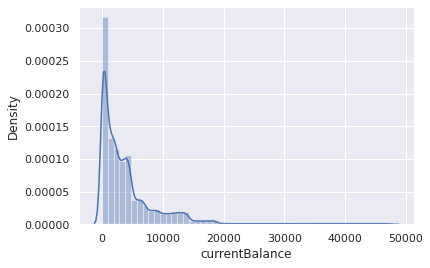

In [14]:
sns.distplot(df[~df['isFraud']]['currentBalance'])

Since 2 graphs are similar, there is probably weak relation between "currentBalance" and "isFraud".

## 2.4 Column "transactionAmount"

In [15]:
df['transactionAmount'].describe()

count    786363.000000
mean        136.985791
std         147.725569
min           0.000000
25%          33.650000
50%          87.900000
75%         191.480000
max        2011.540000
Name: transactionAmount, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


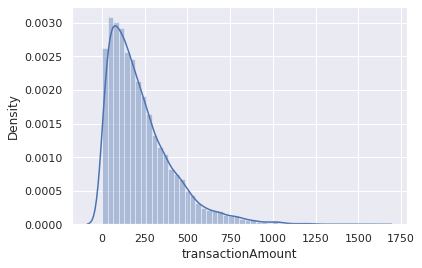

In [16]:
sns.distplot(df[df['isFraud']]['transactionAmount'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


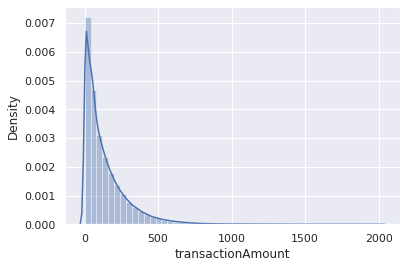

In [17]:
sns.distplot(df[~df['isFraud']]['transactionAmount'])

It seems like transationAmount has an impact on whether it is a fraud.

## 2.5 Column "creditLimit"

In [18]:
df['creditLimit'].describe()

count    786363.000000
mean      10759.464459
std       11636.174890
min         250.000000
25%        5000.000000
50%        7500.000000
75%       15000.000000
max       50000.000000
Name: creditLimit, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


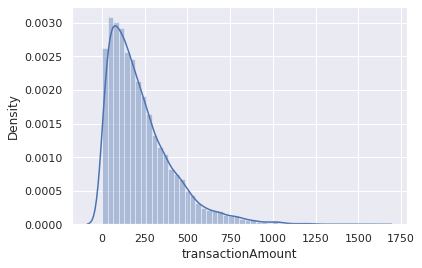

In [19]:
sns.distplot(df[df['isFraud']]['transactionAmount'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


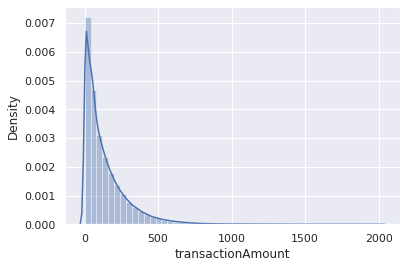

In [20]:
sns.distplot(df[~df['isFraud']]['transactionAmount'])

It is highly likely that "creditLimit" has an influence on the response variable.

## 2.6 Column "cardPresent"

In [21]:
df['cardPresent'].value_counts()

False    433495
True     352868
Name: cardPresent, dtype: int64

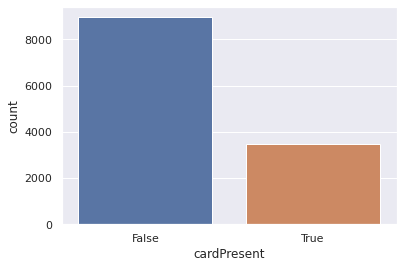

In [22]:
sns.countplot(data = df[df['isFraud']], x = 'cardPresent')

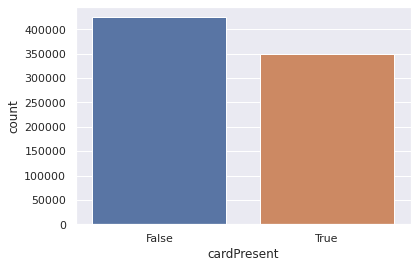

In [23]:
sns.countplot(data = df[~df['isFraud']], x = 'cardPresent')

The "cardPresent" column has an impact on the response variable.